### Notebook 2 - correlations of node centralities' ranks in trade and technology graphs (Spearman correlation)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import spearmanr

seed = 100

In [2]:
trade_centr_path = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/trade/'
tech1_centr_path = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology1/'
tech2_centr_path = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/technology2/'

In [3]:
centrality_names = {
    'betweenness_centr_uw' : 'Betweenness Centrality - Unweighted',
    'betweenness_centr' : 'Betweenness Centrality - Weighted',
    'pagerank_centr_uw' : 'PageRank Centrality - Unweighted',
    'degree_centr' : 'Degree Centrality - Weighted',
    'pagerank_centr' : 'PageRank Centrality - Weighted',
    'eigenv_centr' : 'Eigenvector Centrality - Weighted',
    'eigenv_centr_uw' : 'Eigenvector Centrality - Unweighted',
    'closeness_centr' : 'Closeness Centrality - Weighted' 
}

In [4]:
# all computed centrality names
centr_names = []
for filename in os.listdir(trade_centr_path):
    centr_names.append(filename.replace('.csv', ''))
print(centr_names)

['betweenness_centr_uw', 'pagerank_centr_uw', 'degree_centr', 'pagerank_centr', 'eigenv_centr', 'eigenv_centr_uw', 'closeness_centr', 'betweenness_centr']


In [5]:
def plot_correlations(df, xlabel, title):
    plt.figure(figsize=(25, 10))
    plt.plot(df, 'o-', linewidth=2.5)

    plt.grid()
    plt.legend(list(map(lambda x: centrality_names[x], res1_df.columns)), loc="lower center", ncol=4, 
               fontsize=13)

    ymin = np.min(df.values)
    ymax = np.max(df.values)

    plt.ylim(ymin - 0.2, ymax + 0.1)
    plt.xlim(df.index[0], df.index[-1])

    plt.yticks(np.arange(round(ymin, 1) - 0.1, round(ymax, 1) + 0.1, 0.1))
    plt.xticks(np.arange(df.index[0], df.index[-1] + 1, 1))
    
    plt.title(title, fontsize=25)
    plt.ylabel('Correlation coefficient', fontsize=13)
    plt.xlabel(xlabel, fontsize=13)

    plt.show()

In [6]:
def add_pvlaue_level(coef, pvalue):
    if pvalue <= 0.1 and pvalue > 0.05:
        asterisks = '*'
    elif pvalue <= 0.05 and pvalue > 0.01:
        asterisks = '**'
    elif pvalue <= 0.01:
        asterisks = '***'
    else:
        asterisks = ''
    return (str(coef) + '$^{' + asterisks + '}$')

In [7]:
# check how many countries do we have in different dimension pairs

### technology 1 & trade
trade_centr = pd.read_csv(f'{trade_centr_path}{centr_names[3]}.csv', index_col=0).fillna(method='ffill')
trade_set = set(trade_centr.columns)
tech1_centr = pd.read_csv(f'{tech1_centr_path}{centr_names[3]}.csv', index_col=0).fillna(method='ffill')
tech1_set = set(tech1_centr.columns)
print(f'countries in trade centr. dataframe: {len(trade_set)}')
print(f'countries in tech.1 centr. dataframe: {len(tech1_set)}')
print(f'intersection in trade and tech.1: {len(trade_set.intersection(tech1_set))}')
print(f'intersection rate: {len(trade_set.intersection(tech1_set)) / min(len(trade_set), len(tech1_set))}')
print(' ')
### technology 2 & trade
tech2_centr = pd.read_csv(f'{tech2_centr_path}{centr_names[3]}.csv', index_col=0).fillna(method='ffill')
tech2_set = set(tech2_centr.columns)
print(f'countries in trade centr. dataframe: {len(trade_set)}')
print(f'countries in tech.2 centr. dataframe: {len(tech2_set)}')
print(f'intersection in trade and tech.2: {len(trade_set.intersection(tech2_set))}')
print(f'intersection rate: {len(trade_set.intersection(tech2_set)) / min(len(trade_set), len(tech2_set))}')

countries in trade centr. dataframe: 253
countries in tech.1 centr. dataframe: 160
intersection in trade and tech.1: 155
intersection rate: 0.96875
 
countries in trade centr. dataframe: 253
countries in tech.2 centr. dataframe: 160
intersection in trade and tech.2: 155
intersection rate: 0.96875


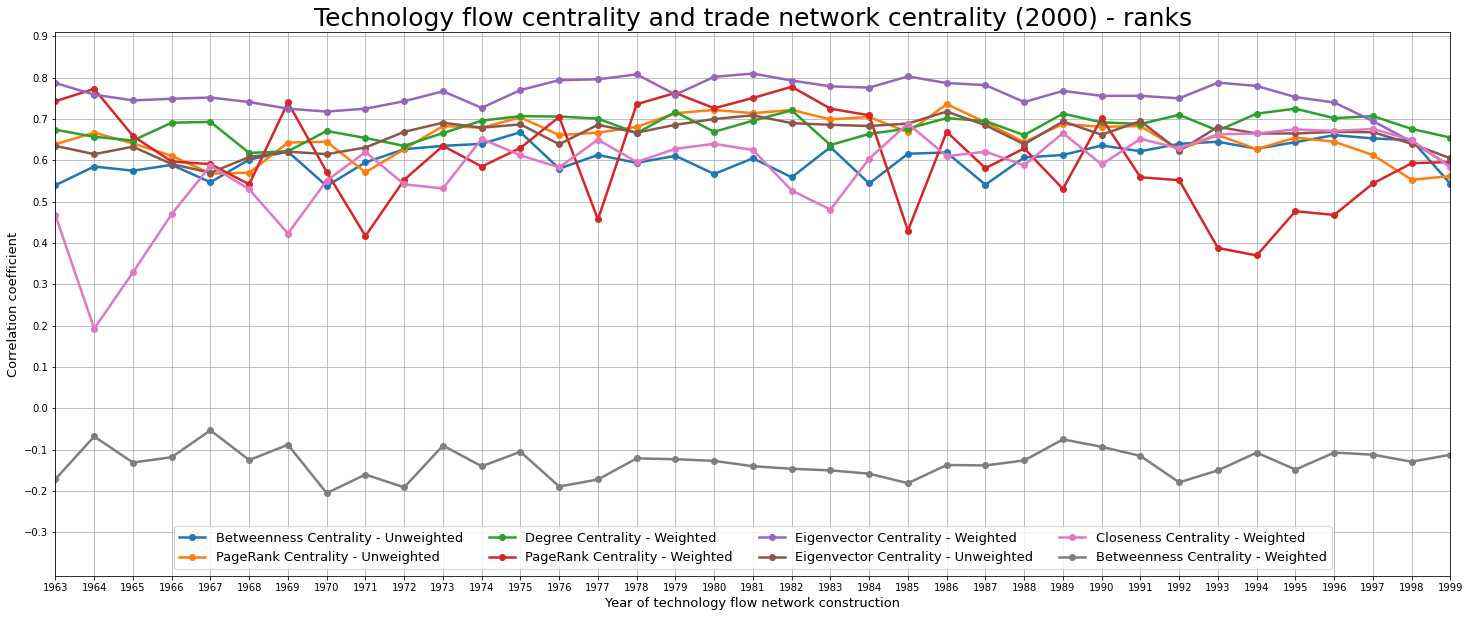

In [8]:
# iterative correlation computation - simple centralities (no averaging)
# technology 1 & trade 
# technology 1: 1963 - 1999
# trade: 2000

tech_path = tech1_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech1_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1963, 2000, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[tech_year]
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2000]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1963, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality and trade network centrality (2000) - ranks')

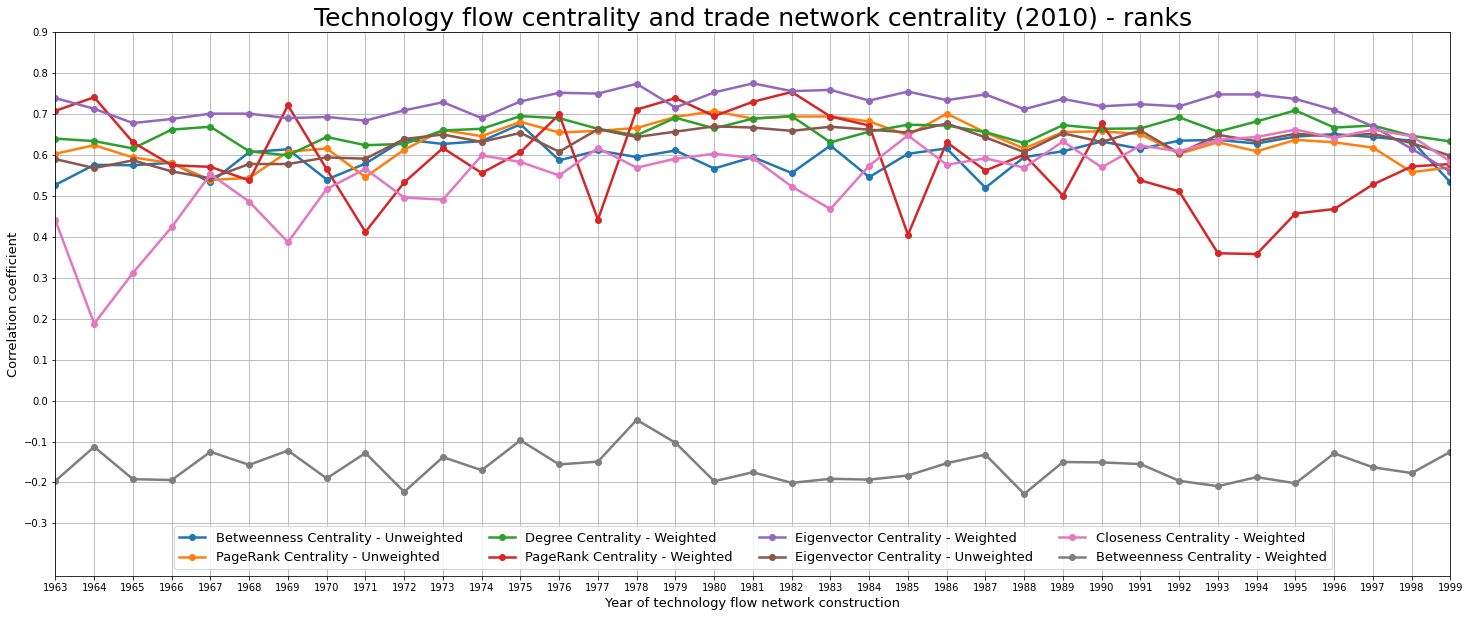

In [9]:
# iterative correlation computation - simple centralities (no averaging)
# technology 1 & trade 
# technology 1: 1963 - 1999
# trade: 2010

tech_path = tech1_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech1_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1963, 2000, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[tech_year]
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2010]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1963, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality and trade network centrality (2010) - ranks')

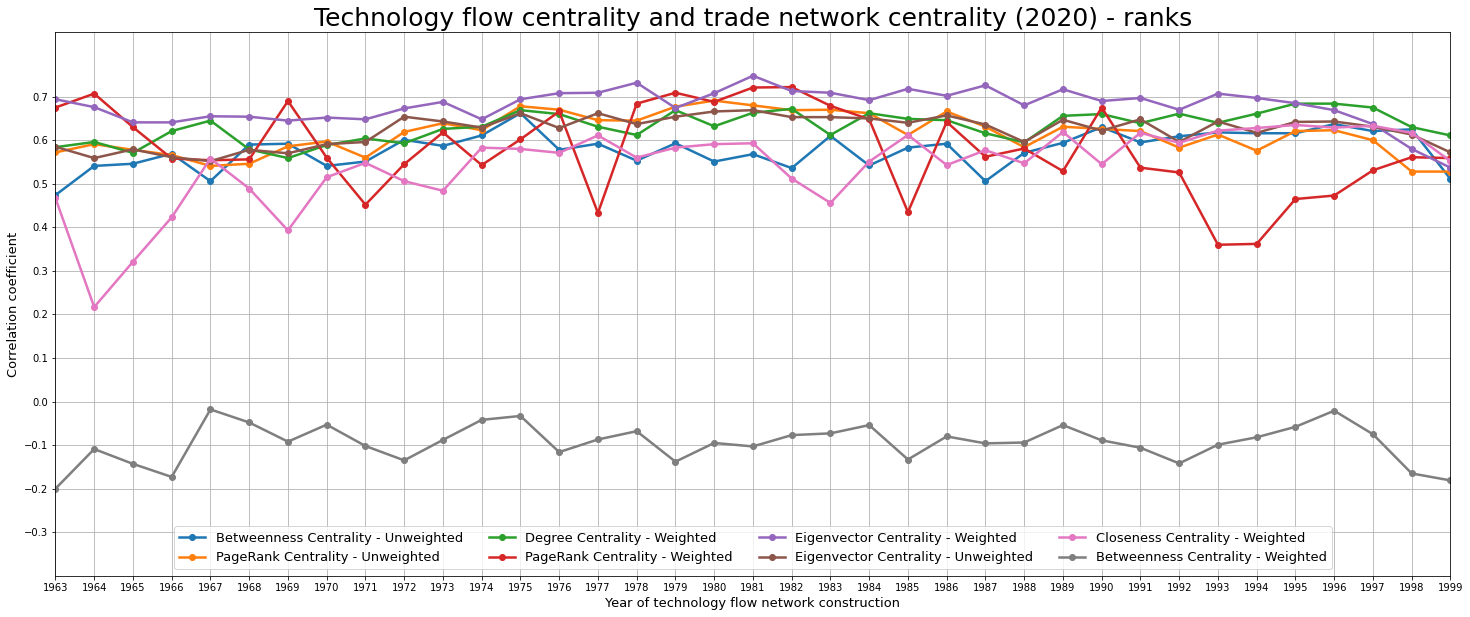

In [10]:
# iterative correlation computation - simple centralities (no averaging)
# technology 1 & trade 
# technology 1: 1963 - 1999
# trade: 2020

tech_path = tech1_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech1_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1963, 2000, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[tech_year]
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2020]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1963, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality and trade network centrality (2020) - ranks')

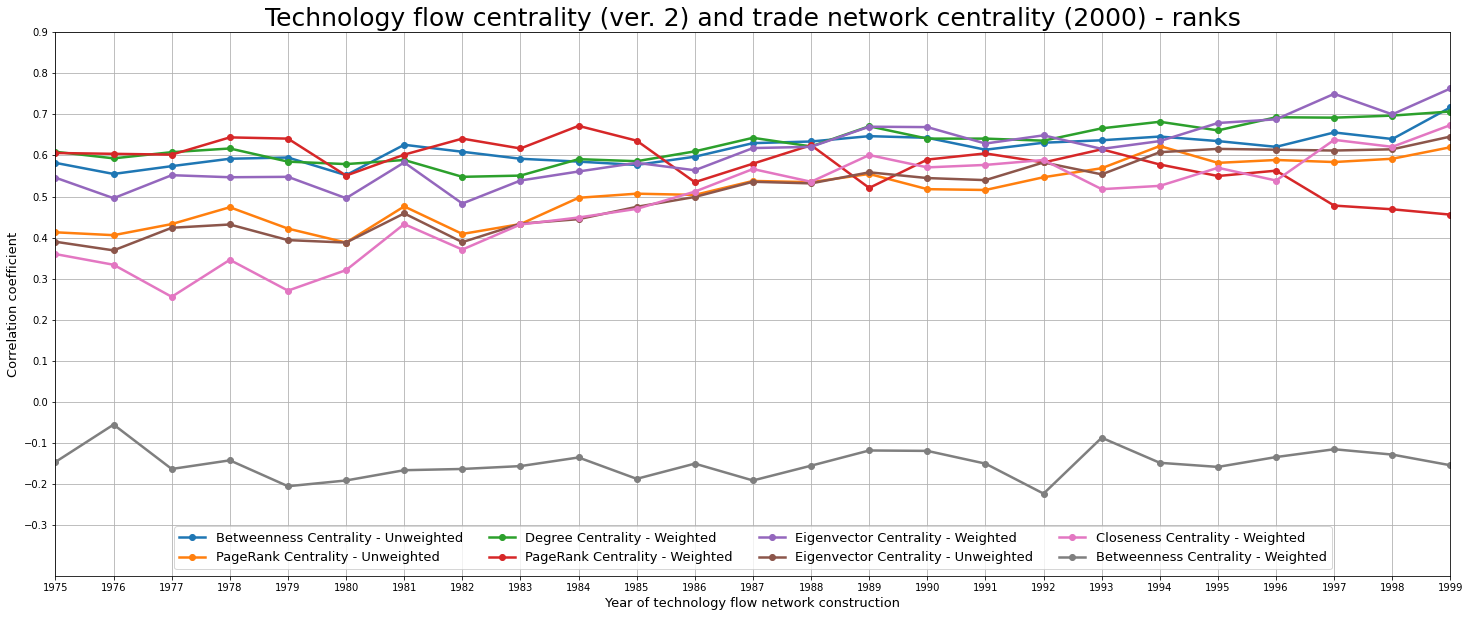

In [11]:
# iterative correlation computation - simple centralities (no averaging)
# technology 2 & trade 
# technology 2: 1975 - 1999
# trade: 2000

tech_path = tech2_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech2_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1975, 2000, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[tech_year]
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2000]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1975, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality (ver. 2) and trade network centrality (2000) - ranks')

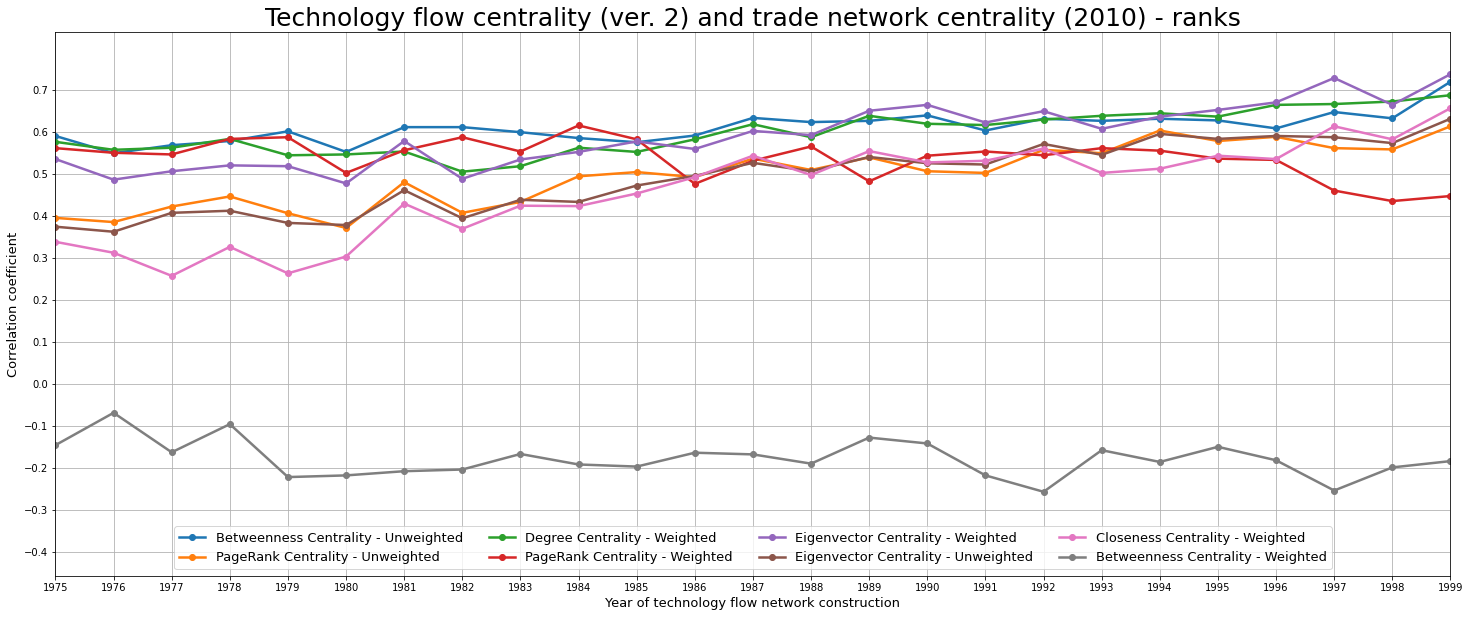

In [12]:
# iterative correlation computation - simple centralities (no averaging)
# technology 2 & trade 
# technology 2: 1975 - 1999
# trade: 2010

tech_path = tech2_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech2_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1975, 2000, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[tech_year]
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2010]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1975, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality (ver. 2) and trade network centrality (2010) - ranks')

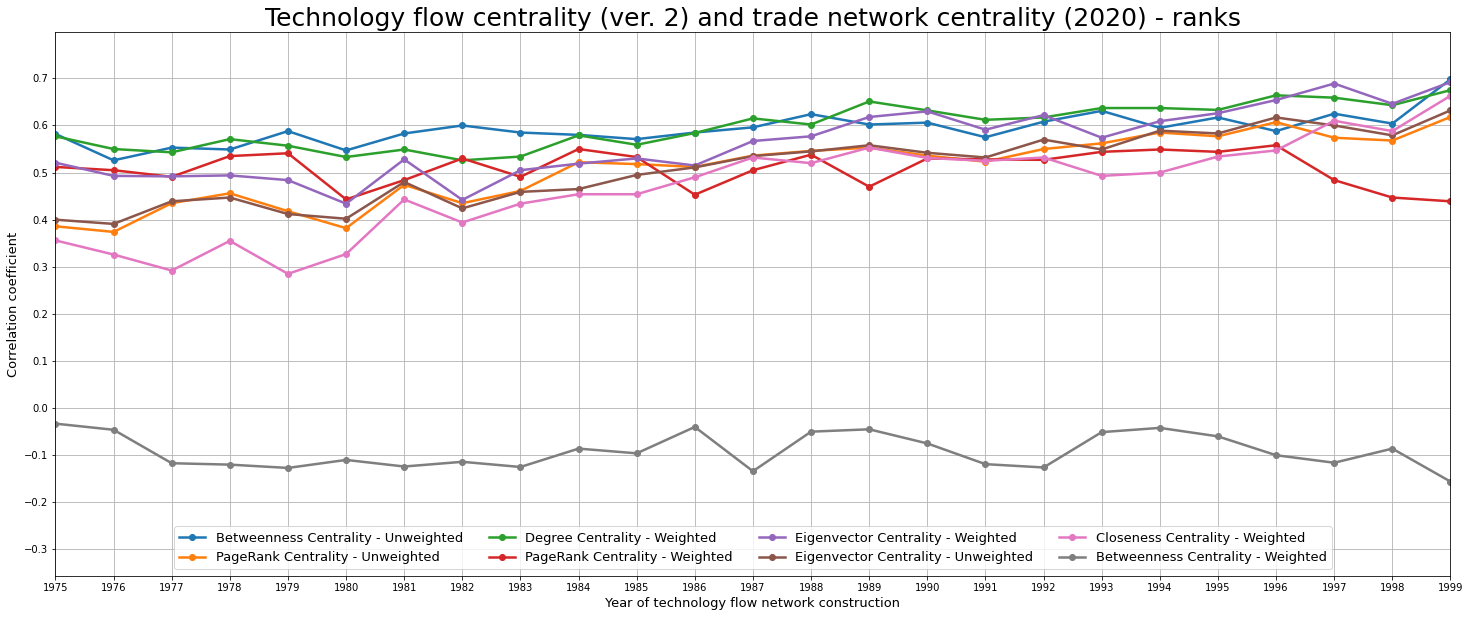

In [13]:
# iterative correlation computation - simple centralities (no averaging)
# technology 2 & trade 
# technology 2: 1975 - 1999
# trade: 2020

tech_path = tech2_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech2_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for tech_year in range(1975, 2000, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[tech_year]
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2020]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(1975, 2000, 1)

plot_correlations(df=res1_df, xlabel='Year of technology flow network construction', 
                  title='Technology flow centrality (ver. 2) and trade network centrality (2020) - ranks')

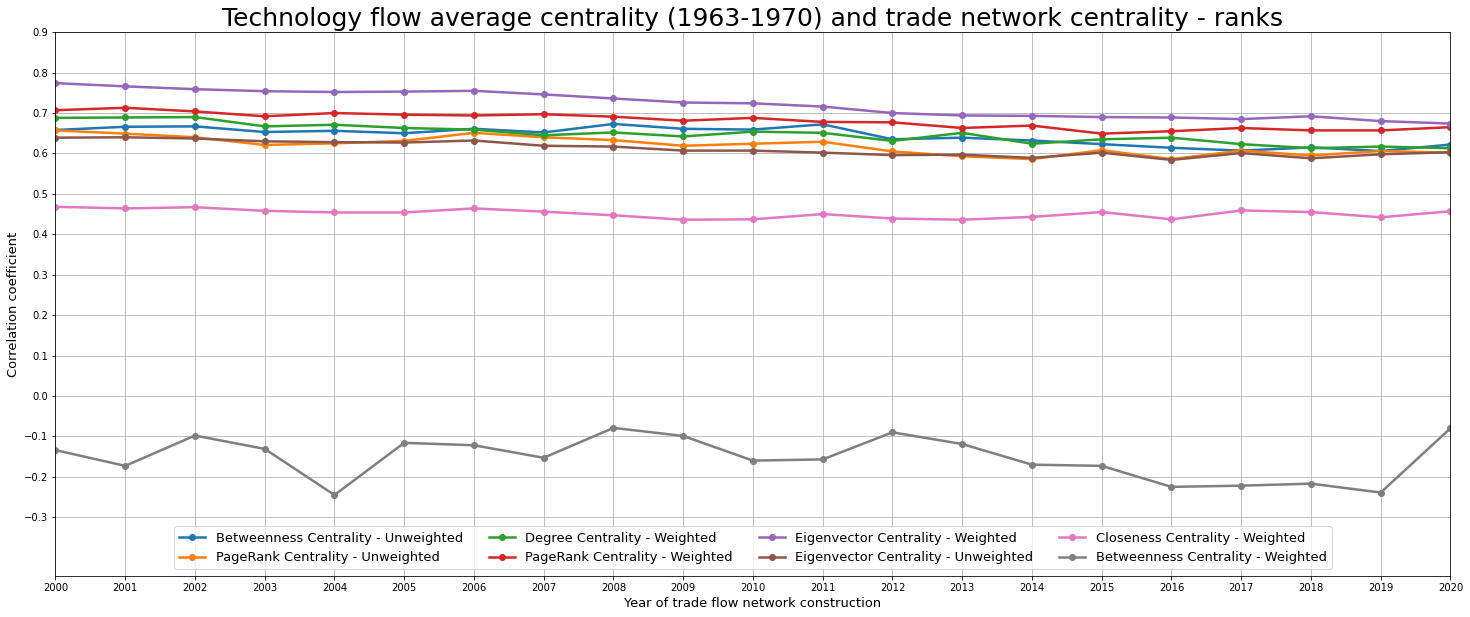

In [14]:
# iterative correlation computation - averaging
# technology 1 & trade 
# technology 1: 1963-1970 average
# trade: years 2000 - 2020 (no averaging)

tech_path = tech1_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech1_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for trade_year in range(2000, 2021, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[1963:1970].mean(axis=0)
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[trade_year]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = list(range(2000, 2021, 1))

plot_correlations(df=res1_df, xlabel='Year of trade flow network construction', 
                  title='Technology flow average centrality (1963-1970) and trade network centrality - ranks')

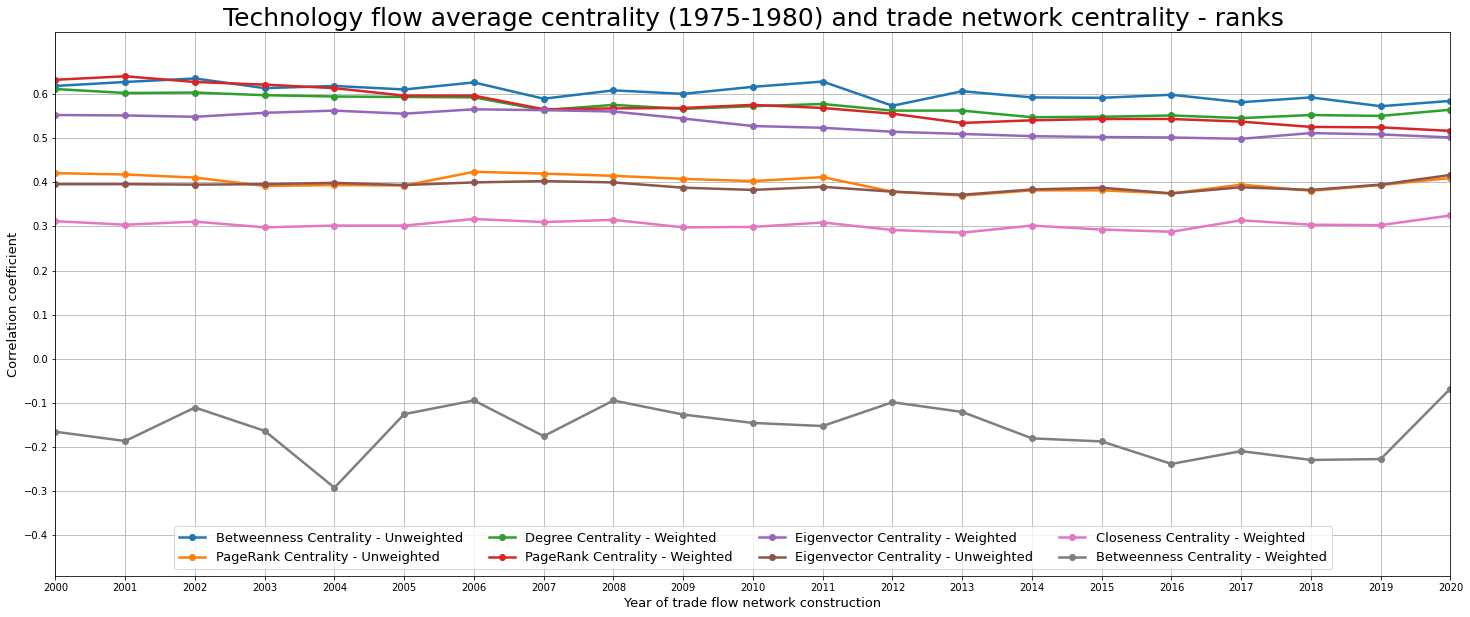

In [15]:
# iterative correlation computation - averaging
# technology 2 & trade 
# technology 2: 1975-1980 average
# trade: years 2000 - 2020 (no averaging)

tech_path = tech2_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech2_set)) # <--- variable
all_correlations = []
all_pvalues = []
for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    centr_correlations = []
    centr_pvalues = []
    for trade_year in range(2000, 2021, 1):    
        tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[1975:1980].mean(axis=0)
        trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[trade_year]
        corr, pvalue = spearmanr(a=tech_array, b=trade_array)
        centr_correlations.append(np.round(corr, 3))
        centr_pvalues.append(np.round(pvalue, 5))
    all_correlations.append(centr_correlations)
    all_pvalues.append(centr_pvalues)
    
res1_df = pd.DataFrame(all_correlations).transpose()
res1_df.columns = centr_names
res1_df.index = range(2000, 2021, 1)

plot_correlations(df=res1_df, xlabel='Year of trade flow network construction', 
                  title='Technology flow average centrality (1975-1980) and trade network centrality - ranks')

In [16]:
# iterative correlation computation - averaging
# technology 1 & trade 
# technology 1: 1963-1970 average
# trade: 2016 - 2020 average

tech_path = tech1_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech1_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[1963:1970].mean(axis=0)
    trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2016:2020].mean(axis=0)
    corr, pvalue = spearmanr(a=tech_array, b=trade_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : 0.611$^{***}$
pagerank_centr_uw : 0.604$^{***}$
degree_centr : 0.624$^{***}$
pagerank_centr : 0.658$^{***}$
eigenv_centr : 0.686$^{***}$
eigenv_centr_uw : 0.598$^{***}$
closeness_centr : 0.454$^{***}$
betweenness_centr : -0.239$^{***}$


In [17]:
# iterative correlation computation - averaging
# technology 2 & trade 
# technology 2: 1975-1980 average
# trade: 2016 - 2020 average

tech_path = tech2_centr_path # <--- variable
tech_trade_interc = list(trade_set.intersection(tech2_set)) # <--- variable

for centr in centr_names:
    tech_centr_df = pd.read_csv(f'{tech_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    trade_centr_df = pd.read_csv(f'{trade_centr_path}{centr}.csv', index_col=0).fillna(method='ffill').fillna(method='bfill')
    tech_array = tech_centr_df[tech_trade_interc].rank(axis=1).loc[1975:1980].mean(axis=0)
    trade_array = trade_centr_df[tech_trade_interc].rank(axis=1).loc[2016:2020].mean(axis=0)
    corr, pvalue = spearmanr(a=tech_array, b=trade_array)
    print(centr, ':', add_pvlaue_level(coef=np.round(corr, 3), pvalue=np.round(pvalue, 5)))

betweenness_centr_uw : 0.586$^{***}$
pagerank_centr_uw : 0.395$^{***}$
degree_centr : 0.554$^{***}$
pagerank_centr : 0.528$^{***}$
eigenv_centr : 0.506$^{***}$
eigenv_centr_uw : 0.392$^{***}$
closeness_centr : 0.309$^{***}$
betweenness_centr : -0.241$^{***}$
